# Final capstone Project- Wallmart Sales Forecasting.

In [2]:
#importing the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [4]:
import datetime

# Read the Dataset 

In [5]:
 data=pd.read_excel('data_sales.xlsx',index_col=0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [7]:
data.shape

(421570, 16)

In [8]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [9]:
#Extracting the date and the year from the given date column.
data['week_no'] = data['Date'].dt.isocalendar().week
data['year'] =data['Date'].dt.isocalendar().year

In [10]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week_no,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,6,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,7,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,8,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,9,2010


<AxesSubplot:>

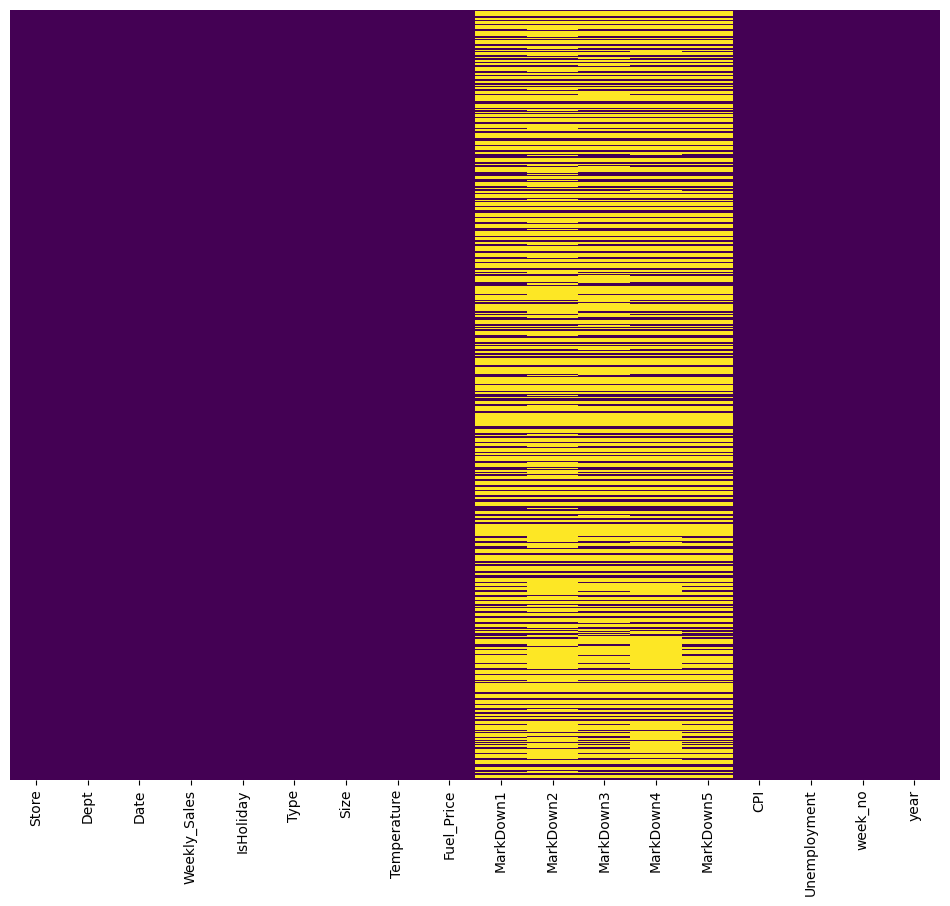

In [11]:
#heat map to understand weather data is missing at random or not
plt.figure(figsize=(12,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
#checking the percentage of Null values in the column.
data.isna().sum()/len(data)*100 

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
week_no          0.000000
year             0.000000
dtype: float64

In [13]:
percent=(data.isna().sum()/len(data)*100).sort_values(ascending=False)
total_null_values=data.isnull().sum().sort_values(ascending=False)
missing_data=pd.concat([percent,total_null_values],axis=1,keys=['total','percentage'])
missing_data.head(20)

,total,percentage
MarkDown2,73.611025,310322
MarkDown4,67.984676,286603
MarkDown3,67.480845,284479
MarkDown1,64.257181,270889
MarkDown5,64.079038,270138
Dept,0.000000,0
week_no,0.000000,0
Unemployment,0.000000,0
CPI,0.000000,0
Store,0.000000,0


In [14]:
#markdown 1,
#markdown 2, 
#markdown 3, 
#markdown 4, 
#markdown 5           has  64%-75%  of null values.

In [15]:
data.fillna(0,inplace=True)
# we are filling null values with 0 supposing that there is no discount or promotions sales.

In [19]:
# checking the percentage of null values
data.isna().sum()/len(data)*100

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
Type            0.0
Size            0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
week_no         0.0
year            0.0
dtype: float64

<AxesSubplot:>

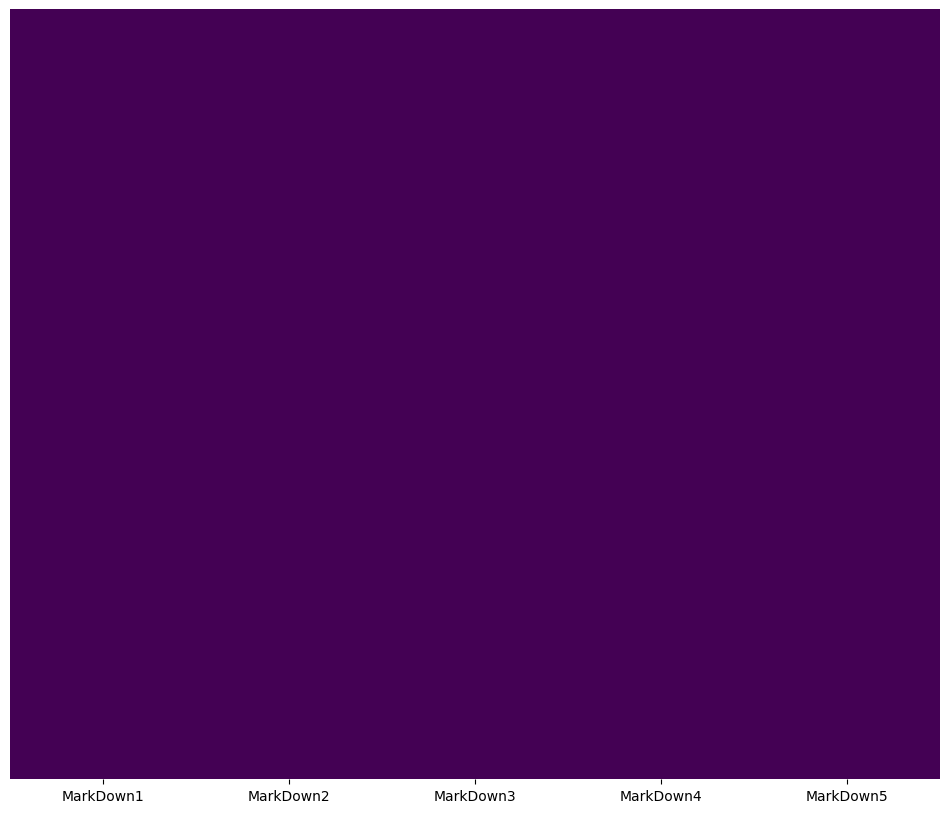

In [22]:
#undersatnding null values of "MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5".
plt.figure(figsize=(12,10))
sns.heatmap(data[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000


In [24]:
Negative_sales=data[data.Weekly_Sales<0]
Negative_sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week_no,year
846,1,6,2012-08-10,-139.65,False,A,151315,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,32,2012
2384,1,18,2012-05-04,-1.27,False,A,151315,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143,18,2012
6048,1,47,2010-02-19,-863.00,False,A,151315,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106,7,2010
6049,1,47,2010-03-12,-698.00,False,A,151315,57.79,2.667,0.00,0.0,0.00,0.00,0.00,211.380643,8.106,10,2010
6051,1,47,2010-10-08,-58.00,False,A,151315,63.93,2.633,0.00,0.0,0.00,0.00,0.00,211.746754,7.838,40,2010


In [25]:
# we are removing the sales which are having the sales in the negative value
data=data[data.Weekly_Sales>0]

In [26]:
data=data.reset_index(drop=True)

In [27]:
data.shape

(420212, 18)

# Exploratory Data Analysis

## Univariate-Analysis

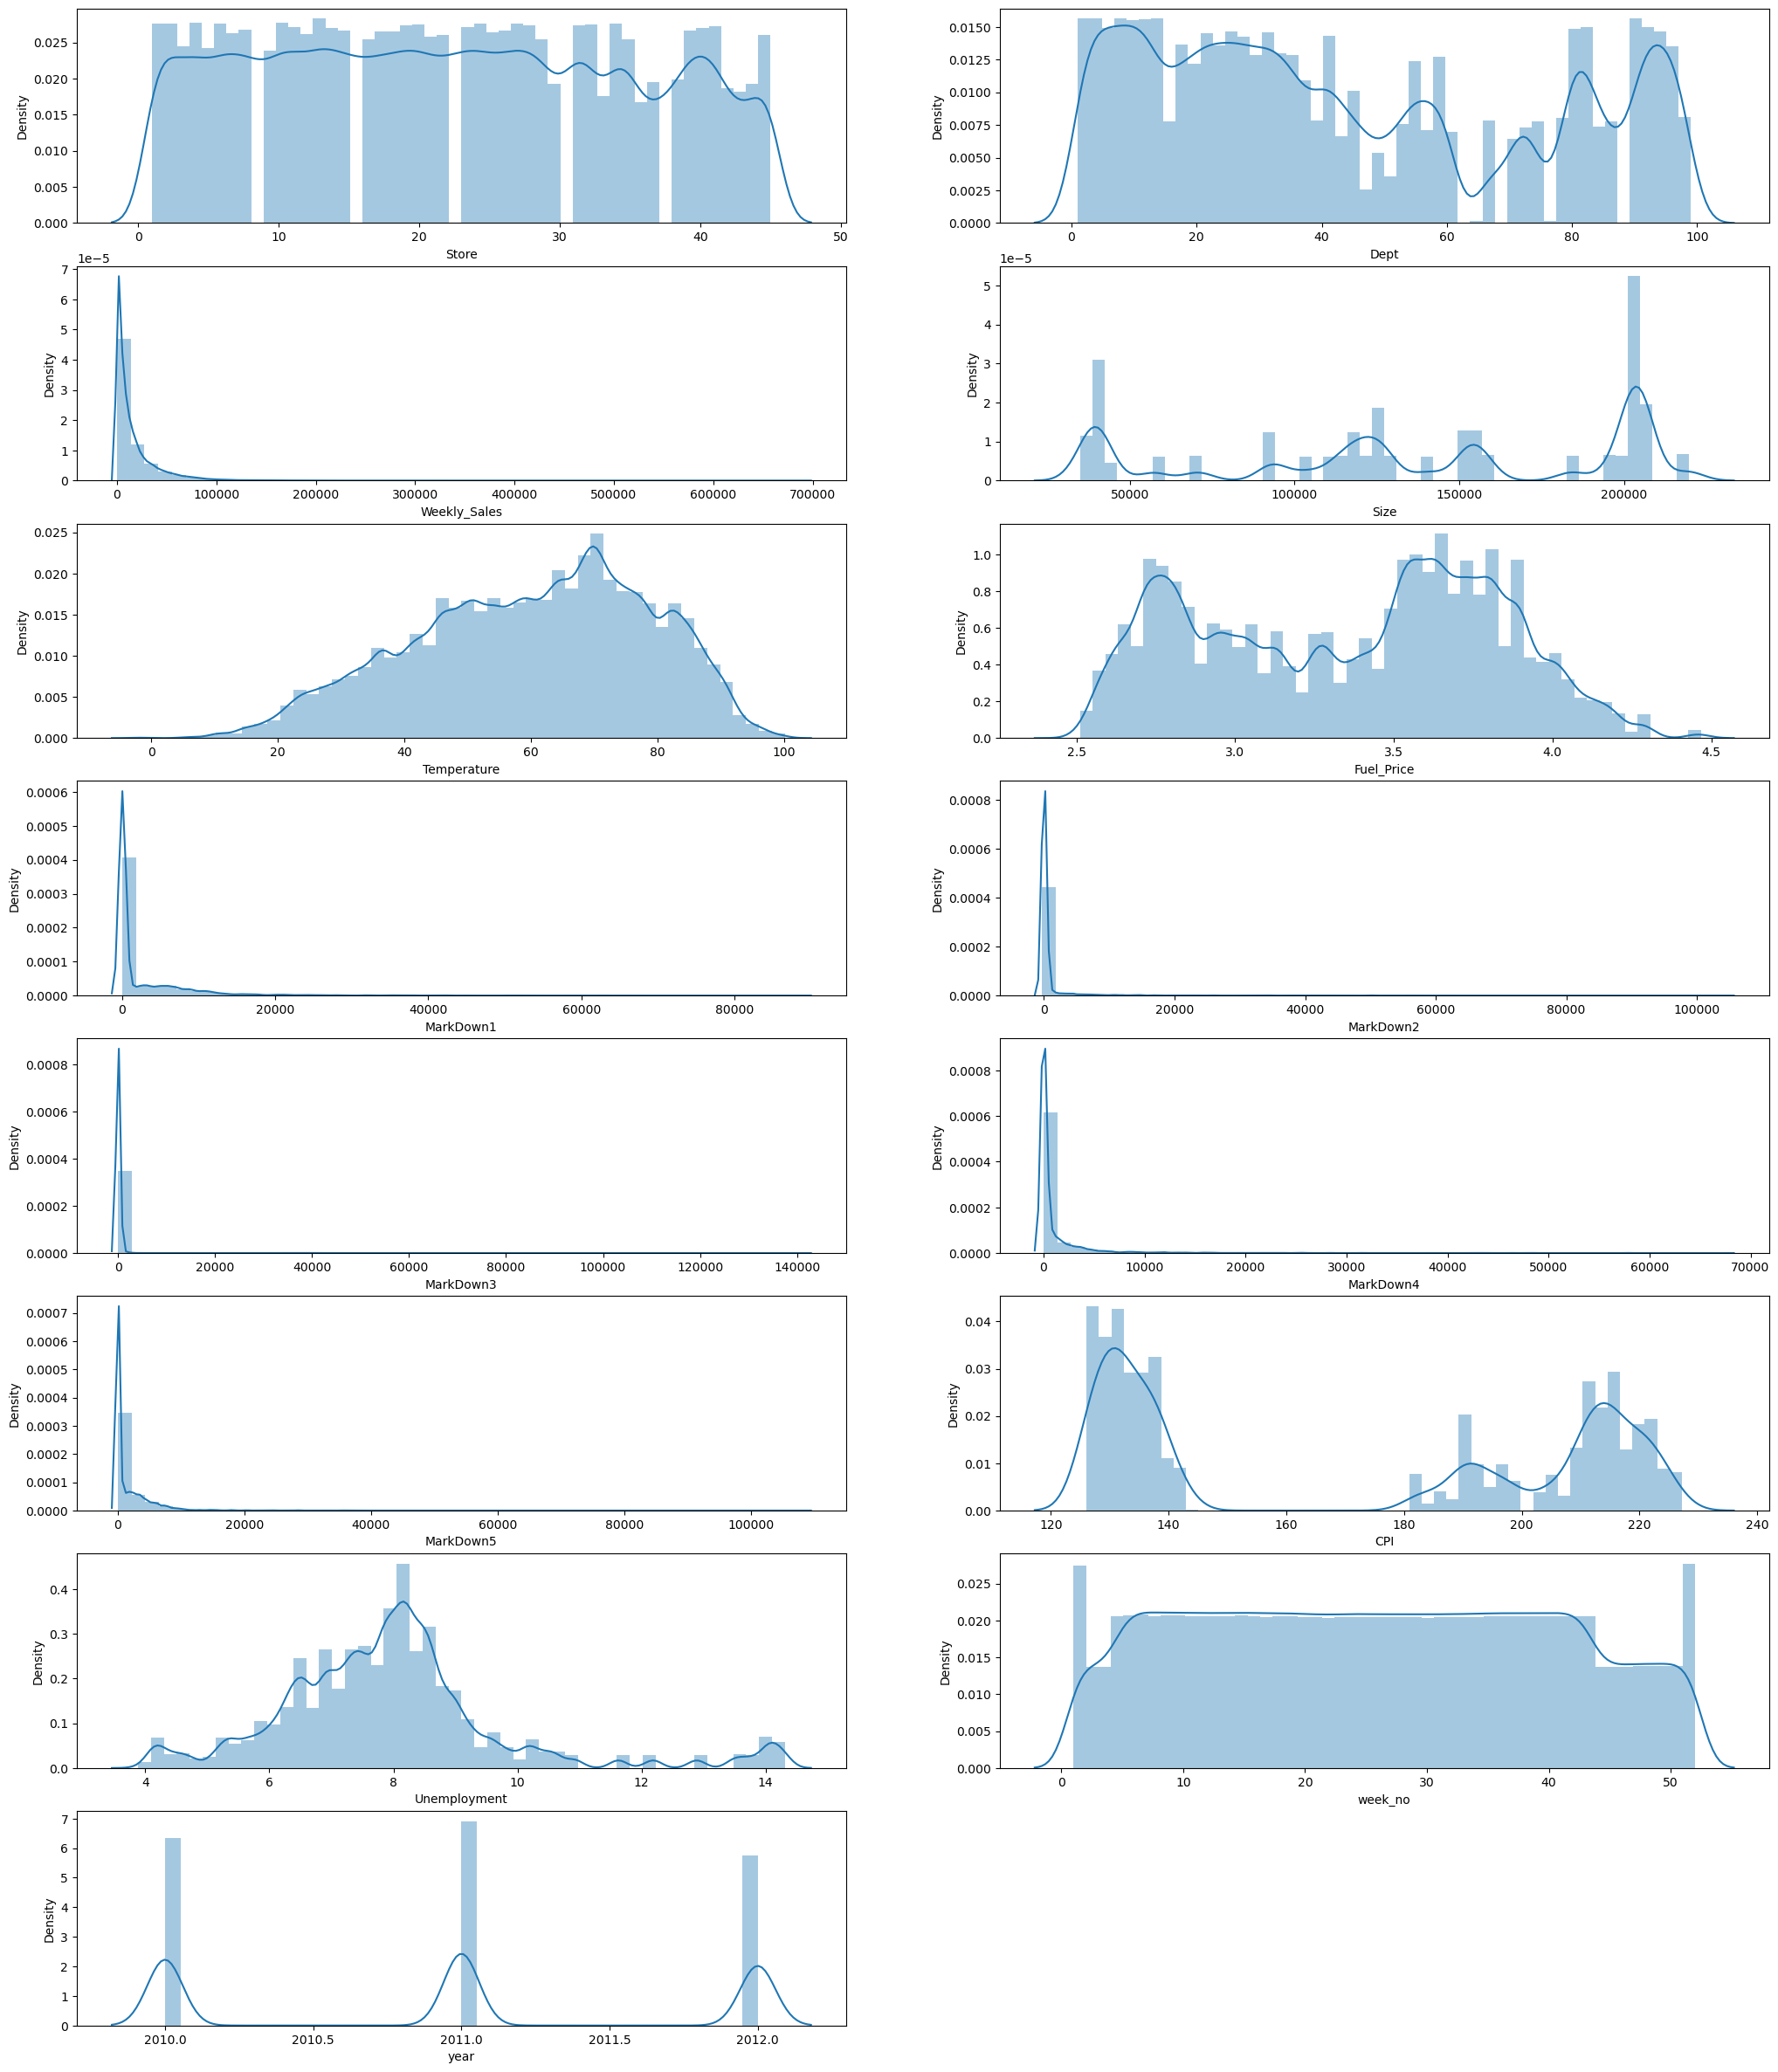

In [28]:
plt.figure(figsize=(25,30))
j=1
for i in data.select_dtypes(include='number').columns:
    plt.subplot(8,2,j)
    sns.distplot(data[i])
    j+=1   

In [29]:
for i in data.select_dtypes(include='number').columns:
    skw=data[i].skew()
    print('The skewness of each feature is',i, skw)

The skewness of each feature is Store 0.07794671892572297
The skewness of each feature is Dept 0.3590157409155355
The skewness of each feature is Weekly_Sales 3.2589416917621374
The skewness of each feature is Size -0.3266891237503309
The skewness of each feature is Temperature -0.3212947111364435
The skewness of each feature is Fuel_Price -0.10467785959643745
The skewness of each feature is MarkDown1 4.730933160765937
The skewness of each feature is MarkDown2 10.649277433566306
The skewness of each feature is MarkDown3 14.908889970818208
The skewness of each feature is MarkDown4 8.075124982175453
The skewness of each feature is MarkDown5 9.952112062499289
The skewness of each feature is CPI 0.08467321916265362
The skewness of each feature is Unemployment 1.1837886849987374
The skewness of each feature is week_no 0.052382700873375085
The skewness of each feature is year 0.05648455551151581


In [30]:
skw[skw>0.5]

array([], dtype=float64)

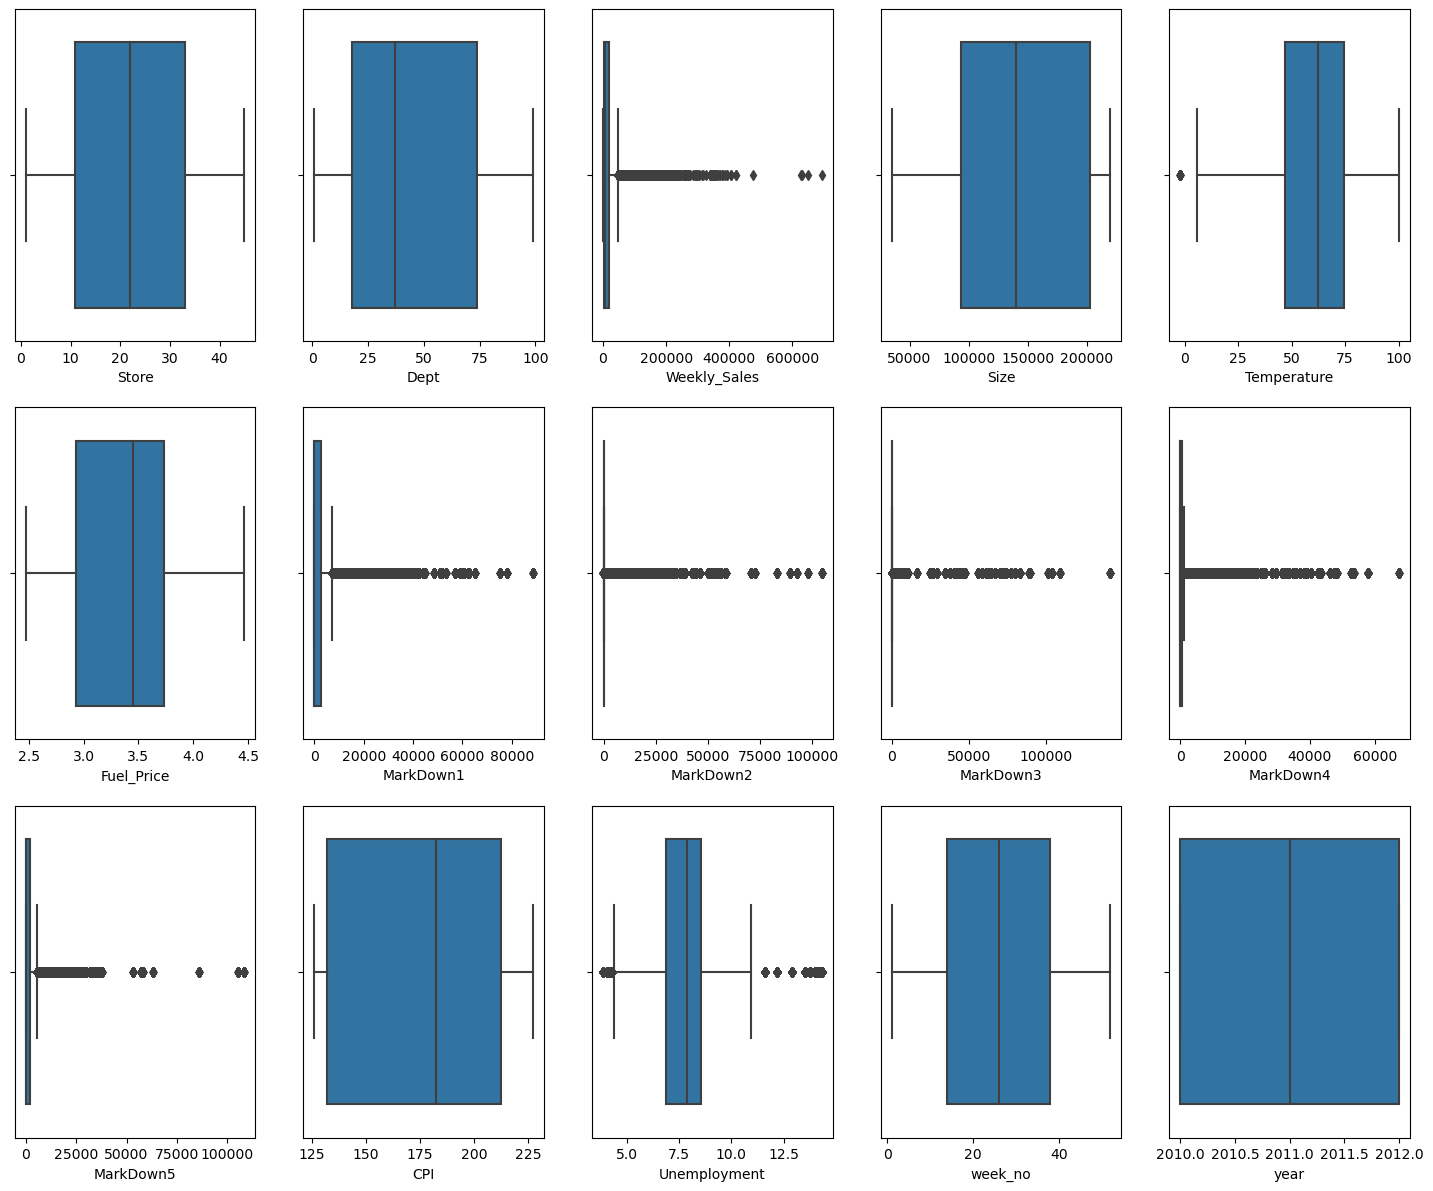

In [31]:
#checking for the outliers using Boxplot.
num=data.select_dtypes(include='number').columns
plt.figure(figsize=(18,25))
j=1
for i in num:
    plt.subplot(5,5,j)
    sns.boxplot(data[i])
    j+=1

In [32]:
# features like weekly sales, temperature, markdown1, markdown2, markdown3, markdown4,markdown5,unemployment have outliers

# Bi-variate Analysis

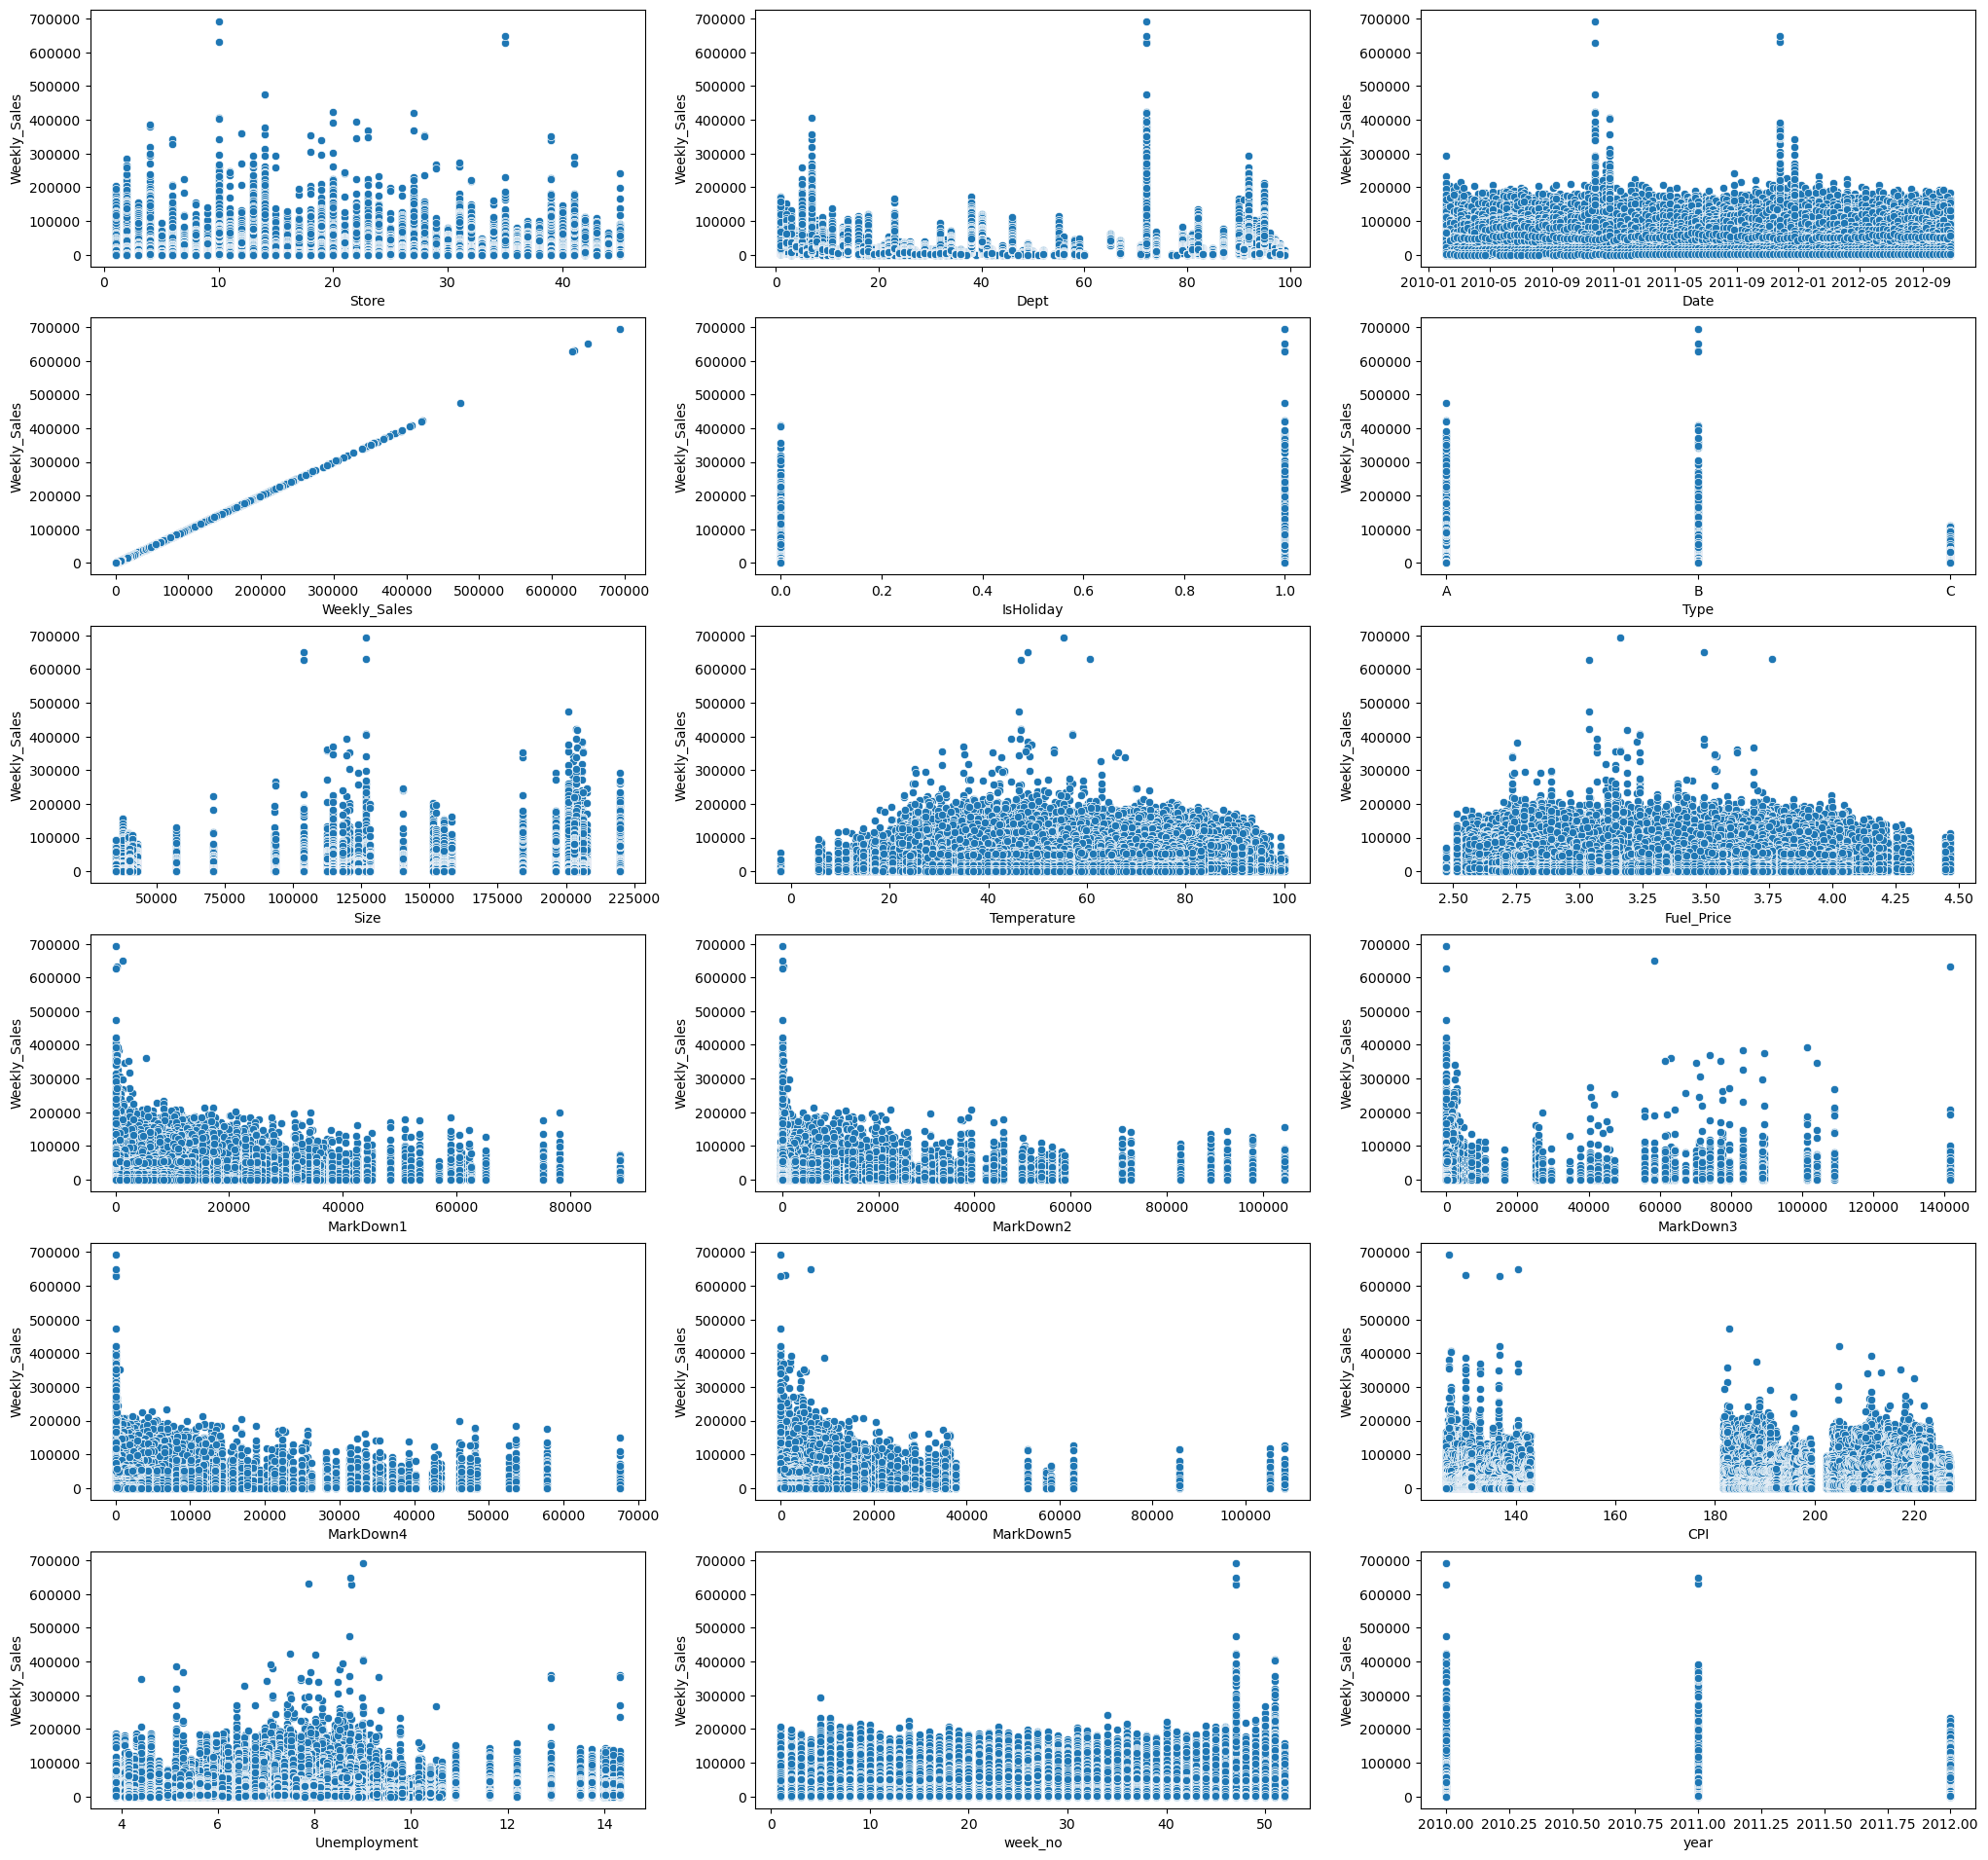

In [33]:
plt.figure(figsize=(25,24))
j=1
for i  in data.columns:
    plt.subplot(6,3,j)
    sns.scatterplot(y=data['Weekly_Sales'],x=data[i])
    j+=1

## Multivariate-Analysis

<AxesSubplot:>

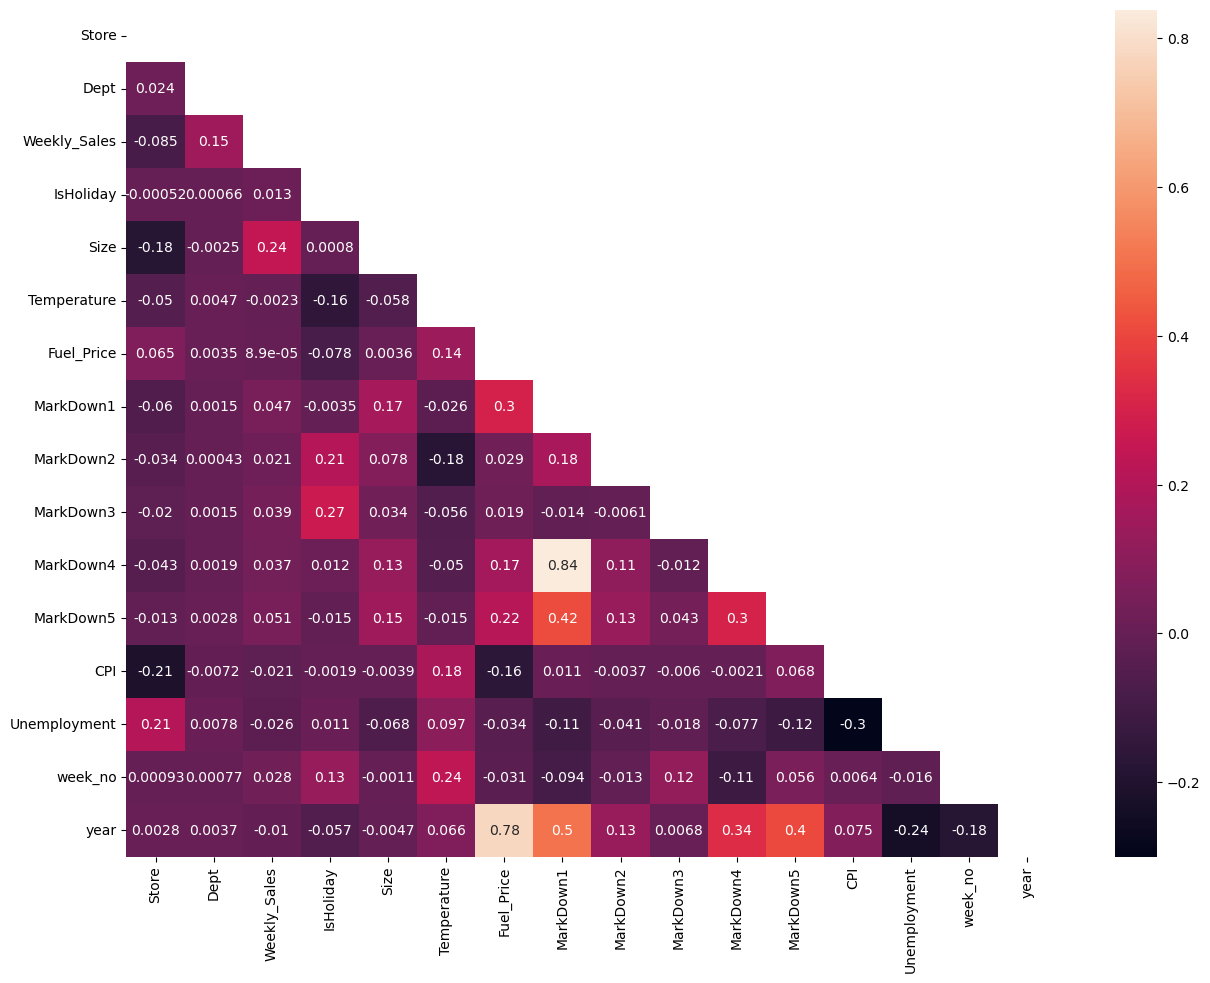

In [34]:
plt.figure(figsize=(15,11))
sns.heatmap(data.corr(),annot=True,mask=(np.triu(data.corr())))

In [35]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week_no,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,6,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,7,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,8,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,9,2010


In [36]:
data.groupby('year')['Weekly_Sales'].sum()

year
2010    2.288919e+09
2011    2.448233e+09
2012    2.000156e+09
Name: Weekly_Sales, dtype: float64

## Analysis Based on Years

Text(0.5, 1.0, 'Annual Sales')

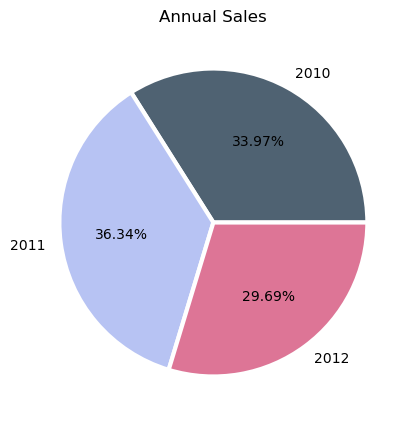

In [37]:
plt.figure(figsize=(5,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596']
plt.pie(data.groupby('year')['Weekly_Sales'].sum(),labels=data['year'].unique(),normalize=True,autopct='%.2f%%',colors=colors,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Annual Sales')

In [38]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'week_no', 'year'],
      dtype='object')

In [39]:
Total_sales_per_year=data.groupby(by=[data['year'],'Type'])['Weekly_Sales'].sum()

In [40]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week_no,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,6,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,7,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,8,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,9,2010


In [41]:
Total_sales_per_year_df=Total_sales_per_year.to_frame()
Total_sales_per_year_df.unstack()

Weekly_Sales                            
Type             A             B             C
year                                          
2010  1.465451e+09  6.899885e+08  1.334796e+08
2011  1.578222e+09  7.241358e+08  1.458744e+08
2012  1.287384e+09  5.866174e+08  1.261540e+08

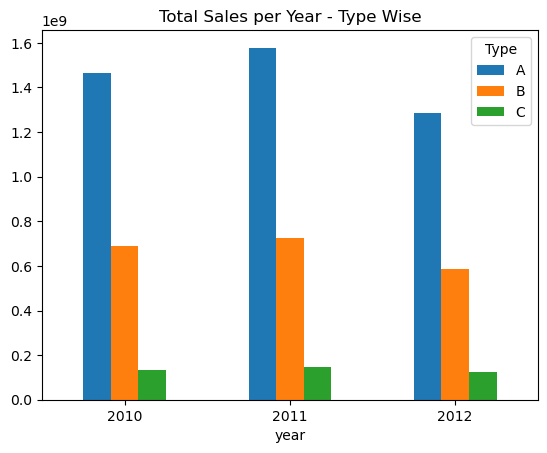

In [42]:
Total_sales_per_year=data.groupby(by=[data['year'],'Type'])['Weekly_Sales'].sum()
Total_sales_per_year.unstack().plot(kind='bar')
plt.title('Total Sales per Year - Type Wise')
plt.xticks(rotation=0)
plt.show()

In [43]:
df = data

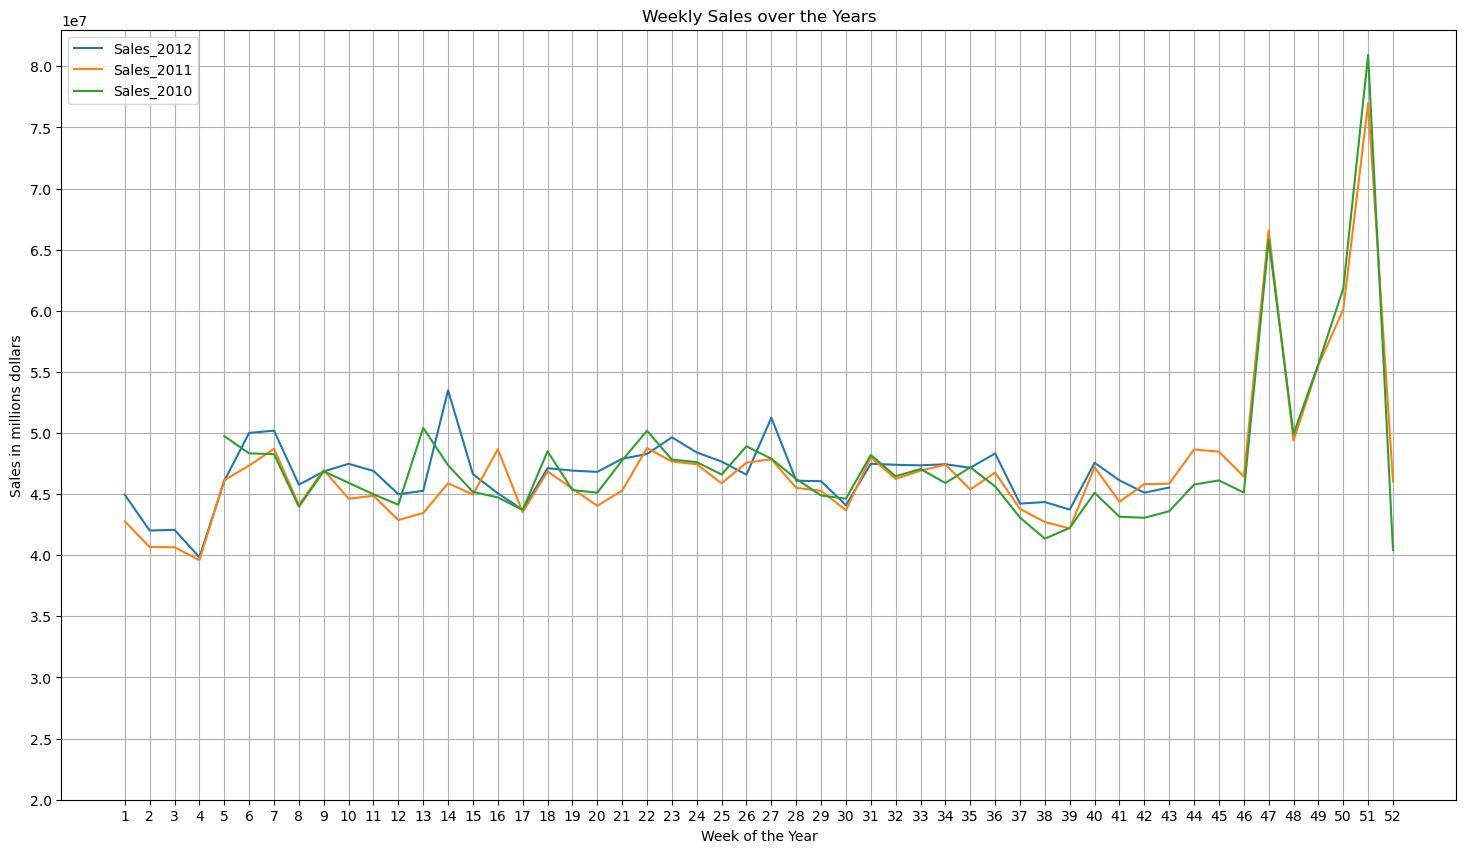

In [44]:
df_2010 = df.loc[ (df['Date'].dt.year==2010), ['Date', 'Weekly_Sales'] ].groupby(by='Date').sum()
df_2011 = df.loc[ (df['Date'].dt.year==2011), ['Date', 'Weekly_Sales'] ].groupby(by='Date').sum()
df_2012 = df.loc[ (df['Date'].dt.year==2012), ['Date', 'Weekly_Sales'] ].groupby(by='Date').sum()

a10 = pd.DataFrame(data = {'Week_num':df_2010.index.isocalendar().week , 'Sales_2010':df_2010['Weekly_Sales']})
a11 = pd.DataFrame(data = {'Week_num':df_2011.index.isocalendar().week , 'Sales_2011':df_2011['Weekly_Sales']})
a12 = pd.DataFrame(data = {'Week_num':df_2012.index.isocalendar().week , 'Sales_2012':df_2012['Weekly_Sales']})

x = pd.merge(a11, a10, how='outer', on='Week_num')
y = pd.merge(a12, x, how='outer', on='Week_num')
plt.figure(figsize=(18,10))
for i in y.columns[1:]:
    plt.plot(y['Week_num'], y[i], label=i)
plt.ylabel("Sales in millions dollars")
plt.xlabel("Week of the Year")
plt.xticks(np.arange(1,53))
plt.yticks(np.arange(20000000, 85000000, 5000000))
plt.title('Weekly Sales over the Years')
plt.legend()
plt.grid()
plt.show()

# Statistical testing

In [45]:
# since target variable is not Normal Distrubuted we will go with non parametric test: 'Spearman test'
# Ho = target variable and variable are independent
# H1 = target variable and variable are dependent
# we are considering confidence level of 95% and taking p value = 0.05

In [46]:
columns=['Store', 'Dept','Weekly_Sales','IsHoliday','Type','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
       'MarkDown4', 'MarkDown5','CPI','Unemployment']

In [47]:
for i in columns:
    
    a=stats.spearmanr(data['Weekly_Sales'],data[i])
    print("weekly sales vs",i,"is",a)

weekly sales vs Store is SpearmanrResult(correlation=-0.10220763462855423, pvalue=0.0)
weekly sales vs Dept is SpearmanrResult(correlation=-0.012410463657415225, pvalue=8.609401755709969e-16)
weekly sales vs Weekly_Sales is SpearmanrResult(correlation=1.0, pvalue=0.0)
weekly sales vs IsHoliday is SpearmanrResult(correlation=0.005747814397348129, pvalue=0.00019456619173518732)
weekly sales vs Type is SpearmanrResult(correlation=-0.22512519460095612, pvalue=0.0)
weekly sales vs Size is SpearmanrResult(correlation=0.29090655512211266, pvalue=0.0)
weekly sales vs Temperature is SpearmanrResult(correlation=-0.019919897183678897, pvalue=3.7494983073050285e-38)
weekly sales vs Fuel_Price is SpearmanrResult(correlation=0.002554317768500706, pvalue=0.09776179649741153)
weekly sales vs MarkDown1 is SpearmanrResult(correlation=0.02904746806873466, pvalue=4.007393310895309e-79)
weekly sales vs MarkDown2 is SpearmanrResult(correlation=0.033634279343346875, pvalue=1.901387659281783e-105)
weekly sale

In [48]:
Sp_Test=[round(stats.spearmanr(data['Weekly_Sales'],data[i])[1],3) for i in columns ]
Sp_Test=pd.DataFrame({'Vaiable':columns,'P_value':Sp_Test})
Sp_Test

,Vaiable,P_value
0,Store,0.000
1,Dept,0.000
2,Weekly_Sales,0.000
3,IsHoliday,0.000
4,Type,0.000
5,Size,0.000
6,Temperature,0.000
7,Fuel_Price,0.098
8,MarkDown1,0.000
9,MarkDown2,0.000


In [49]:
Sp_Test[Sp_Test['P_value']>0.05]

,Vaiable,P_value
7,Fuel_Price,0.098


## Interpretation:

In [50]:
data.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week_no,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,6,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,7,2010


# Encoding

In [51]:
#Before Encoding
data['IsHoliday'].head()

0    False
1     True
2    False
3    False
4    False
Name: IsHoliday, dtype: bool

In [52]:
data.IsHoliday=data.IsHoliday.replace({False: 0,True:1}) 

In [53]:
#After Encoding
data['IsHoliday'].head()

0    0
1    1
2    0
3    0
4    0
Name: IsHoliday, dtype: int64

In [54]:
#Before Enocoding
data['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [55]:
T=pd.get_dummies(data.Type,drop_first=True)

In [56]:
df_enc=pd.concat([data,T],axis=1)

In [57]:
df_enc=df_enc.reset_index(drop=True)

In [58]:
df_enc.drop(['Date','Type'],axis=1,inplace=True)

In [59]:
df_enc.year.replace({2010:0,2011:1,2012:2},inplace=True)

In [60]:
df_enc.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week_no,year,B,C
0,1,1,24924.50,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,0,0,0
1,1,1,46039.49,1,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,6,0,0,0
2,1,1,41595.55,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,7,0,0,0
3,1,1,19403.54,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,8,0,0,0
4,1,1,21827.90,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,9,0,0,0


In [61]:
df_enc.shape

(420212, 18)

In [62]:
data2=df_enc

## Train Test Split

In [63]:
X=df_enc.drop('Weekly_Sales',axis=1)

In [64]:
y=df_enc.Weekly_Sales

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [66]:
#Check the shape of Train and Test Data Set
print('X-train',X_train.shape,'X-test',X_test.shape)
print('y-train',y_train.shape,'y-test',y_test.shape)

X-train (294148, 17) X-test (126064, 17)
y-train (294148,) y-test (126064,)


In [67]:
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

### POWER TRANSFOMER

In [68]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()

In [69]:
X_train.head(3)

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week_no,year,B,C
0,17,74,0,93188,59.11,3.842,1832.86,0.00,1.62,8.94,2211.39,131.126667,6.235,17,2,1,0
1,32,23,0,203007,29.16,2.550,0.00,0.00,0.00,0.00,0.00,189.534100,9.014,7,0,0,0
2,36,38,0,39910,54.38,3.503,377.29,417.07,0.44,0.00,537.36,219.114830,7.244,7,2,0,0


In [70]:
object_col=['IsHoliday','year','B','C']

In [71]:
train=pd.DataFrame(PT.fit_transform(X_train.drop(object_col,axis=1)),columns=X_train.drop(object_col,axis=1).columns)

In [72]:
X_train=pd.concat([train,X_train[object_col]],axis=1)
X_train.head()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week_no,IsHoliday,year,B,C
0,-0.303413,0.975100,-0.725491,-0.099815,1.054385,1.297182,-0.211325,-0.122137,0.617688,1.304519,-1.040341,-0.976081,-0.546590,0,2,1,0
1,0.786555,-0.543524,1.093978,-1.616327,-1.728878,-0.741195,-0.211325,-0.318947,-0.680468,-0.748862,0.567028,0.675535,-1.385943,0,0,0,0
2,1.048119,0.006878,-1.571187,-0.357688,0.293755,1.103898,0.312053,-0.247998,-0.680468,1.136900,1.174197,-0.298215,-1.385943,0,2,0,0
3,0.230962,-0.720129,1.107677,0.407887,1.408879,1.430900,0.216528,0.936992,1.604799,1.356007,-0.802684,0.645587,0.616815,0,2,0,0
4,1.546077,-1.490820,-1.571187,0.048910,0.993059,1.118606,-0.211325,-0.315200,-0.680468,1.125908,-1.042089,-1.788772,0.985436,0,2,0,1


In [73]:
test=pd.DataFrame(PT.transform(X_test.drop(object_col,axis=1)),columns=X_test.drop(object_col,axis=1).columns)

In [74]:
X_test=pd.concat([test,X_test[object_col]],axis=1)
X_test.head()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week_no,IsHoliday,year,B,C
0,0.514803,0.006878,1.149585,-0.935242,-0.708951,-0.741195,-0.211325,-0.318947,-0.680468,-0.748862,-1.193913,2.659774,1.454057,0,0,0,0
1,-0.551987,0.479096,1.058412,0.549188,-1.408094,-0.741195,-0.211325,-0.318947,-0.680468,-0.748862,0.411411,0.531121,0.925117,0,0,0,0
2,-1.205626,-0.461128,-1.086675,-1.355153,-1.323482,-0.741195,-0.211325,-0.318947,-0.680468,-0.748862,0.598572,0.735249,1.163957,0,0,1,0
3,0.918512,-0.025825,0.341492,-0.872287,-0.610933,-0.741195,-0.211325,-0.318947,-0.680468,-0.748862,-1.144384,1.300484,-1.292173,0,1,0,0
4,1.362890,1.087625,0.981293,-1.266011,0.240687,1.328114,0.407960,0.835227,1.315812,1.396713,0.702678,-0.610560,1.339070,0,1,0,0


In [75]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((294148, 17), (126064, 17), (294148,), (126064,))

In [76]:
#coverting the transformed data to csv
#X_train.to_csv('Xtain.csv')

In [77]:
import statsmodels.api as sm

In [78]:
results=sm.OLS(y_train,X_train.astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.364
Method:                 Least Squares   F-statistic:                              9912.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                        21:32:37   Log-Likelihood:                     -3.3615e+06
No. Observations:              294148   AIC:                                  6.723e+06
Df Residuals:                  294131   BIC:                                  6.723e+06
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Store        -1764.2768     47.972    -36.777      0.000   -1858.301   -1670.253
Dept          2009.0833     40.993     49.011      0.000    1928.739    2089.427
Size          8344.0911     69.724    119.674      0.000    8207.434    8480.748
Temperature   -226.3150     47.958     -4.719      0.000    -320.312    -132.318
Fuel_Price   -5332.7256     57.419    -92.874      0.000   -5445.266   -5220.186
MarkDown1    -2481.2420    412.401     -6.017      0.000   -3289.537   -1672.947
MarkDown2       59.5279     44.133      1.349      0.177     -26.972     146.028
MarkDown3      933.0183     46.953     19.871      0.000     840.992    1025.044
MarkDown4     -735.3044    148.680     -4.946      0.000   -1026.713    -443.896
MarkDown5    -2542.6401    350.812     -7.248      0.000   -3230.223   -1855.058
CPI          -1791.9646     46.105    -38.867      0.000   -1882.329   -1701.600
Unemployment   368.5308     45.661      8.071      0.000     279.036     458.025
week_no       2338.5102     46.592     50.192      0.000    2247.192    2429.829
IsHoliday     1335.6567    166.605      8.017      0.000    1009.116    1662.197
year          1.261e+04     74.410    169.522      0.000    1.25e+04    1.28e+04
B             4544.1620    124.472     36.508      0.000    4300.201    4788.123
C              1.14e+04    217.862     52.317      0.000     1.1e+04    1.18e+04
==============================================================================
Omnibus:                   202287.346   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5397264.208
Skew:                           2.961   Prob(JB):                         0.00
Kurtosis:                      23.132   Cond. No.                         27.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#here r2 is very low and model is not performing well 

**Interpretation:** The R-squared value obtained from this model is 0.077 which means that the above model explains .7% of the variation in the Total_Reimbursement. 

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is close to 2 (= 2.006) which means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

**Condition Number:**
The 'Cond. No' (= 1) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is no multicollinearity in the data.

In [80]:
y_train_predict = results.predict(X_train)

In [81]:
y_test_predict= results.predict(X_test)

# Model Performance

In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [83]:
mse_train =round( mean_squared_error(y_train, y_train_predict),4)

In [84]:
mse_test = round(mean_squared_error(y_test, y_test_predict),4)

In [85]:
print('MSE for train is ',mse_train)
print('MSE for test is ',mse_test)

MSE for train is  493920701.4549
MSE for test is  484970867.9581


#  Linear Regression

**Assumptions of linear regression**
1)The dependent variable must be numeric
2)Linear relationship between dependent and independent variables
3)Predictors must not show multicollinearity
4)Independence of observations should exist (Absence of Autocorrelation)
5)The error terms should be homoscedastic
6)The error terms must follow normal distribution

**Assumption to be checked before building a model**<br>
1)The dependent variable must be numeric.<br>
2)Predictors must not show multicollinearity.<br>

### 1).we know that the target varible is Weekly_sales and that is Numeric.

### 2)Predictors must not show multicollinearity

In [86]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [87]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [88]:
# Linear Base Model using Scikit-learn
lr=LinearRegression()
lr.fit(X_train,y_train)
ypred_train=lr.predict(X_train)
ypred_test=lr.predict(X_test)
print('R-Square Value train:',r2_score(y_train,ypred_train))
print('R-Square Value test:',r2_score(y_test,ypred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
print('RMSE train:',rmse_train)
print('RMSE test:',rmse_test)

R-Square Value train: 0.07697230702815572
R-Square Value test: 0.0745283815982496
RMSE train: 21908.262779708908
RMSE test: 21699.083253251836


**Assumption to be checked after building a model**<br>
3)Linear relationship between dependent and independent variables.<br>
4)Independence of observations should exist (Absence of Autocorrelation).<br>
5)The error terms should be homoscedastic.<br>
6)The error terms must follow normal distribution.

### 3)Linear relationship between dependent and independent variables.

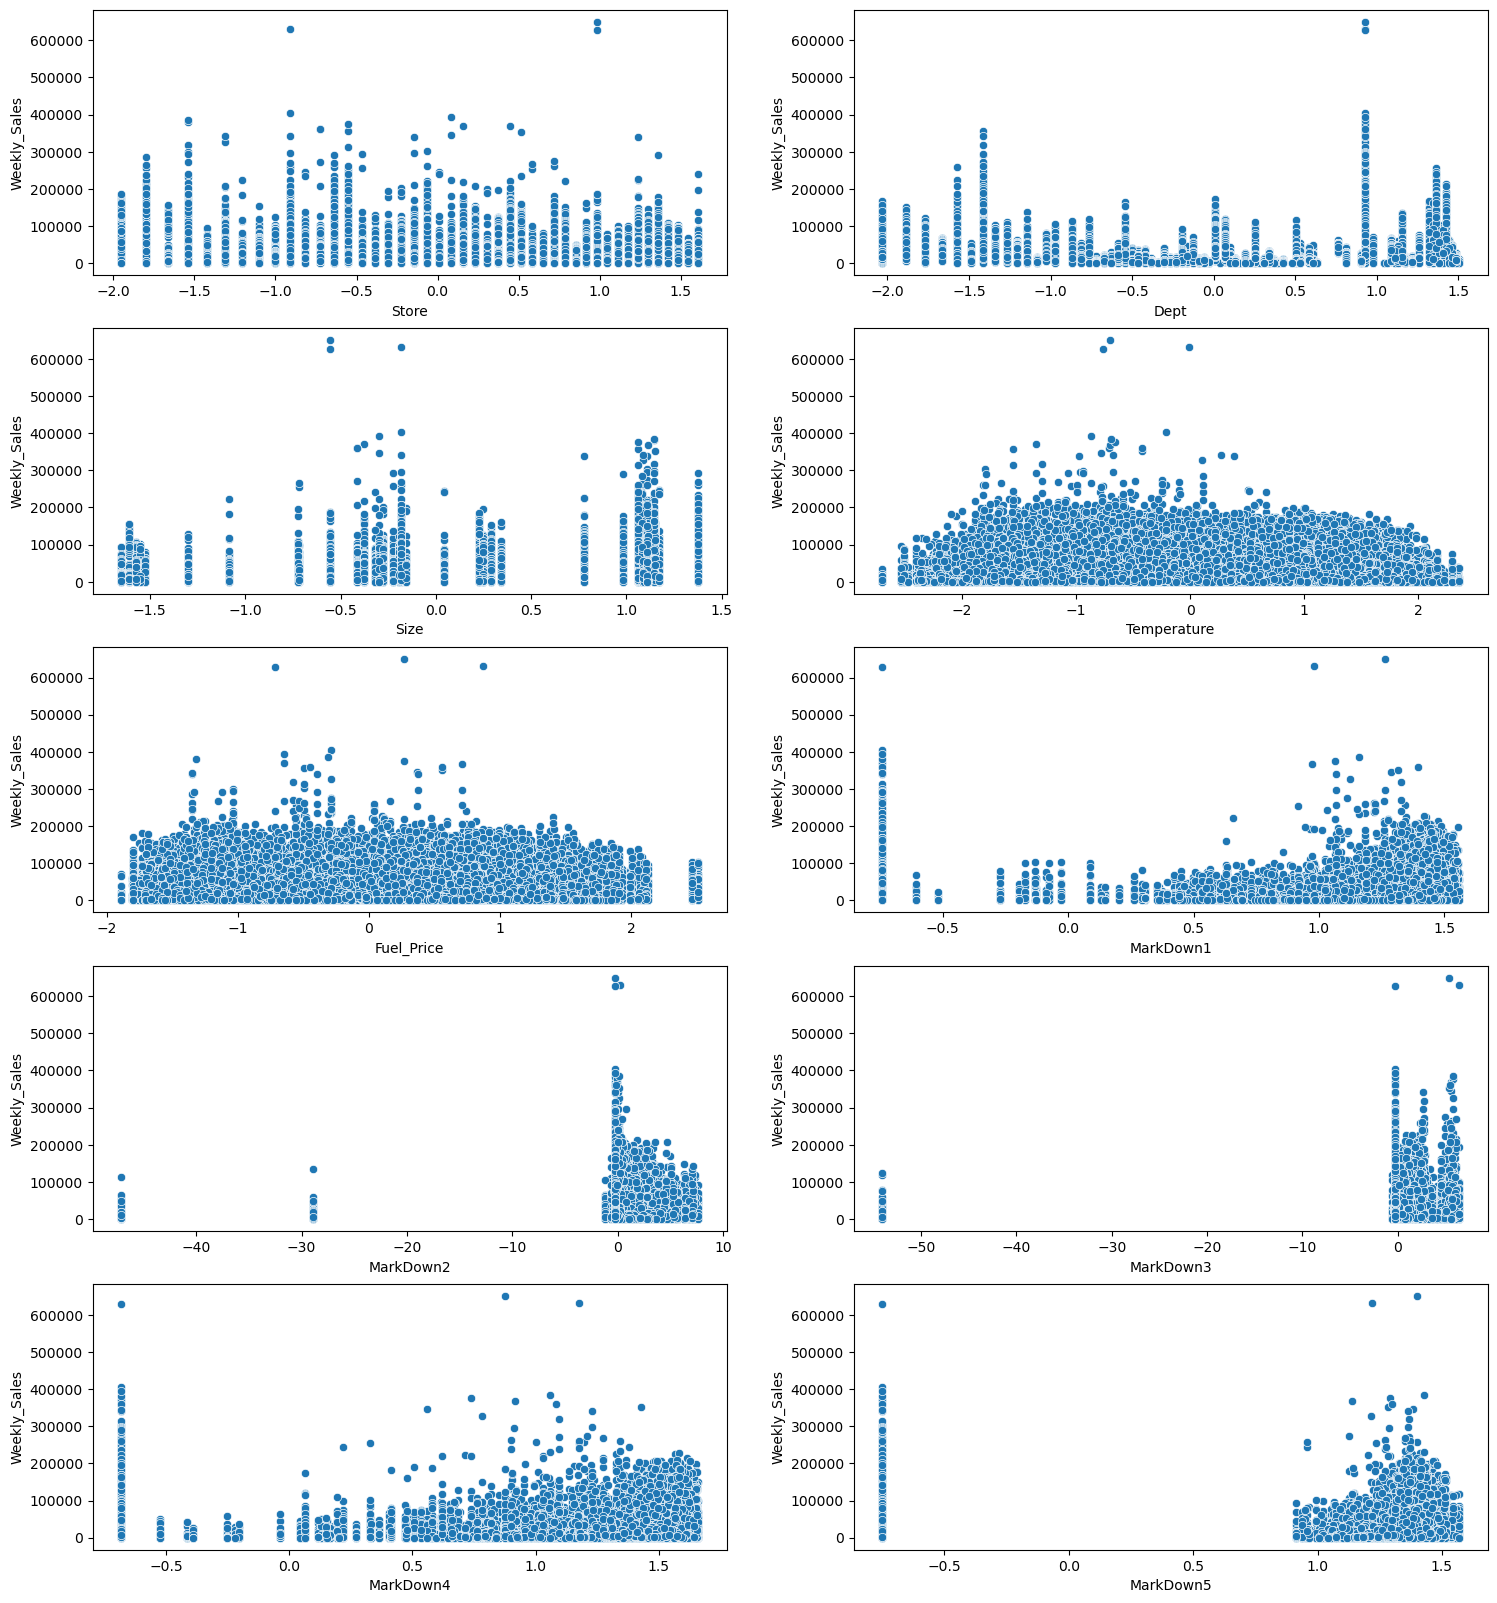

In [89]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(18, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns, ax.flatten()):
    sns.scatterplot(X_train[variable], y_train , ax=subplot)

# display the plot
plt.show()

**Interpretation**: The above plots show no specific pattern, implies that there is a linearity present in the data.

### 4)Independence of observations should exist (Absence of Autocorrelation)

The Durbin-Watson test is used to check the autocorrelation between the residuals.<br>

If the Durbin-Watson test statistic is  near to 2		: No Autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2	: Positive Autocorrelation<br>
If the Durbin-Watson test statistic is between 2 and 4	: Negative Autocorrelation<br>

The summary output shows that the value of the test statistic is close to 2 (= 1.999) which means there is no Autocorrelation.

### 5)The error terms should be homoscedastic.

**Tests for homoscedasticity**
1. Goldfeld Quandt Test
2.Breusch Pagan Test.

Breusch Pagan Test:<br>
If the residuals have constant variance across different values of the predicted values, then it is known as Homoskedasticity. The absence of homoskedasticity is known as, heteroskedasticity. One of the assumptions of linear regression is that heteroskedasticity should not be present. Let us study two different tests to check the presence of heteroskedasticity.

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.
The test hypothesis for the Breusch-Pagan test is given as:

Ho: There is homoskedasticity present in the data

H1: There is a heteroskedasticity present in the data

In [90]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [91]:
results=sm.OLS(y_train,X_train.astype(float)).fit()
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model along with the intercept
test_results = sms.het_breuschpagan(results.resid, results.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(names, test_results[2:])

[('Lagrange multiplier statistic', 1141.1538951692344), ('p-value', 0.0)]

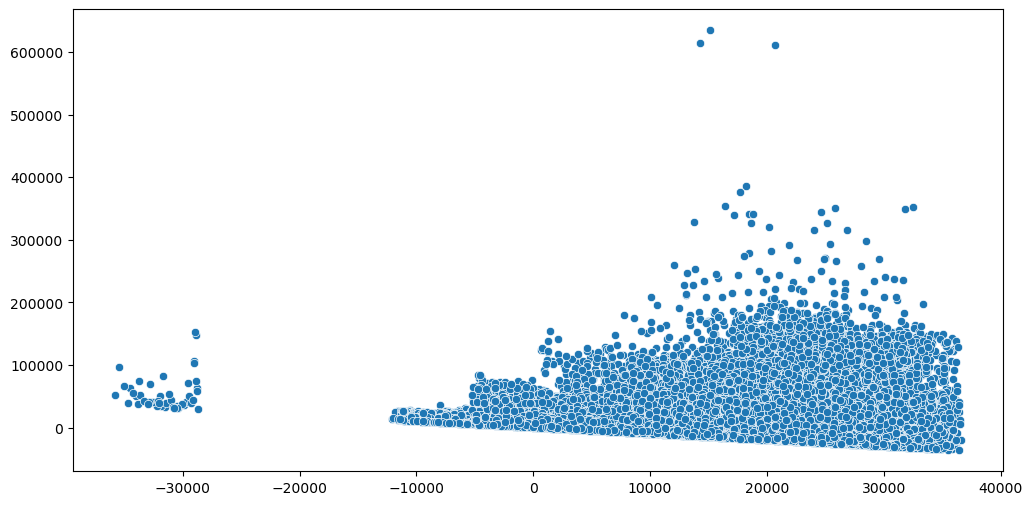

In [92]:
#Homoscedasticity
plt.figure(figsize=(12,6))
sns.scatterplot(results.predict(),results.resid)
plt.show()

Interpretation: We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

### 6)The error terms must follow normal distribution.

**Tests for Normality**<br>
As per the assumptions of linear regression, residuals should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed.
1. Jarque-Bera(JB) Test
2. Shapiro_Wilk Test.
3. Quantile-Quantile Plot(QQ-Plot)

2. Shapiro Wilk Test
   The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

         Ho: Residuals are normally distributed
         H1: Residuals are not normally distributed

In [93]:
from scipy.stats import shapiro

In [94]:
stat, p_value = shapiro(results.resid)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.7698608040809631
P-Value: 0.0


**Interpretation**: From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.

3. Q-Q Plot<br>
Q-Q plot is s visualization technique to check the normality of the residuals. It plots the quantiles of observed data versus the quantiles of the standard normal distribution.

In [95]:
from statsmodels.graphics.gofplots import qqplot

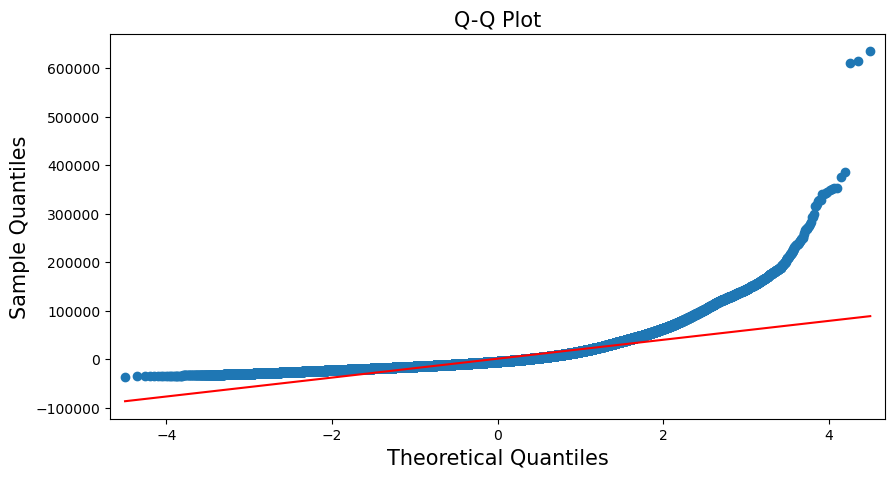

In [96]:
plt.rcParams['figure.figsize'] = [10,5]


qqplot(results.resid, line = 'r')


plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

**Interpretation**: The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are away from the diagonal line, we conclude that the residuals do not follow a normal distribution.

In [ ]:
print99

<h2 style='font-family:rockwell; color:#06917e'> Non-Linear Models:</h2>

# Decision Tree Regressor



In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
dtree=  DecisionTreeRegressor()
dtree.fit(X_train,y_train)

y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

print('mse score of train data: ', mean_squared_error(y_train, y_train_pred) )
print('R^2 score of train data: ',r2_score(y_train, y_train_pred) )

print('mse score of test data: ', mean_squared_error(y_test, y_test_pred) )
print('R^2 score of test data: ', r2_score(y_test, y_test_pred) )       

mse score of train data:  4.437801623024416e-33
R^2 score of train data:  1.0
mse score of test data:  23149050.665786926
R^2 score of test data:  0.9544997777516265


In [99]:
result_rmse_score = pd.DataFrame(index=['Training','Testing'])
result_r2_score = pd.DataFrame(index=['Training','Testing'])


In [100]:
result_rmse_score['DT Base Model'] = [np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)) ]
result_r2_score['DT Base Model'] = [r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred) ]

In [110]:
result_rmse_score

,DT Base Model,DT Tuned Model
Training,6.661683e-17,11178.628629
Testing,4.811346e+03,10968.733480


In [111]:
result_r2_score

,DT Base Model,DT Tuned Model
Training,1.0000,0.759688
Testing,0.9545,0.763521


**Tuning with RandomizedCV**

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
dtree = DecisionTreeRegressor() # estimator


param_dist = {'max_depth' : np.arange(5,20),
             'min_samples_leaf':[15,17,20,25,30,35,40],
              'min_samples_split':[2,5,8,10,12,15],
              'criterion':['mse']}


rsearch  = RandomizedSearchCV(dtree, param_distributions = param_dist, cv=10)

rsearch.fit(X,y)
rsearch.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 40,
 'max_depth': 7,
 'criterion': 'mse'}

Creating tuned model with best params of RandomizedCV object

In [103]:
dtree_rand_tuned = DecisionTreeRegressor(**rsearch.best_params_)
dtree_rand_tuned.fit(X_train,y_train)


y_train_pred = dtree_rand_tuned.predict(X_train)
print('MSE on train data: ', mean_squared_error(y_train, y_train_pred) )
print('R^2 on train data: ', r2_score(y_train, y_train_pred))


y_test_pred = dtree_rand_tuned.predict(X_test)
print('MSE on test data: ', mean_squared_error(y_test, y_test_pred) )
print('R^2 on test data: ', r2_score(y_test, y_test_pred)) 

MSE on train data:  124961738.02967761
R^2 on train data:  0.7596877525268138
MSE on test data:  120313114.16376948
R^2 on test data:  0.7635206076966201


In [104]:
result_rmse_score['DT Tuned Model'] = [np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)) ]
result_r2_score['DT Tuned Model'] = [r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred) ]

In [105]:
result_rmse_score

,DT Base Model,DT Tuned Model
Training,6.661683e-17,11178.628629
Testing,4.811346e+03,10968.733480


In [106]:
result_r2_score

,DT Base Model,DT Tuned Model
Training,1.0000,0.759688
Testing,0.9545,0.763521


# Ensemble Technique:
### Bagging:

# Random Forest
#### Base Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [113]:
rf1 = RandomForestRegressor()
rf1.fit(X_train, y_train)


ytrain_pred =  rf1.predict(X_train)
print('MSE of Train Data: ', mean_squared_error(y_train, y_train_pred))
print('R^2 score of Train Data: ', r2_score(y_train, y_train_pred))


ytest_pred =  rf1.predict(X_test)
print('MSE of Test Data: ', mean_squared_error(y_test, y_test_pred))
print('R^2 score of Test Data: ', r2_score(y_test, y_test_pred))

MSE of Train Data:  124961738.02967761
R^2 score of Train Data:  0.7596877525268138
MSE of Test Data:  120313114.16376948
R^2 score of Test Data:  0.7635206076966201


In [114]:
result_rmse_score['RF Base Model'] = [np.sqrt(mean_squared_error(y_train, y_train_pred)),np.sqrt(mean_squared_error(y_test, y_test_pred)) ]
result_r2_score['RF Base Model'] = [r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred) ]

In [115]:
result_rmse_score

,DT Base Model,DT Tuned Model,RF Base Model
Training,6.661683e-17,11178.628629,11178.628629
Testing,4.811346e+03,10968.733480,10968.733480


In [116]:
result_r2_score

,DT Base Model,DT Tuned Model,RF Base Model
Training,1.0000,0.759688,0.759688
Testing,0.9545,0.763521,0.763521


Tuning Random forest model with RandomizedCV

In [117]:
import time
from scipy.stats import randint as sp_randint

In [118]:
rf2 = RandomForestRegressor()


param_dist = { 'n_estimators':sp_randint(50,100),
              'max_features': sp_randint(1,14),
              'max_depth' : sp_randint(5,20),
             'min_samples_leaf':sp_randint(10,50),
              'min_samples_split':sp_randint(2,50)}


rsearch_rf  = RandomizedSearchCV(estimator=rf2, param_distributions = param_dist, cv=3,random_state=4) 

rsearch_rf.fit(X,y)
rsearch_rf.best_params_

KeyboardInterrupt: 

In [ ]:
rf_tuned = RandomForestRegressor(**rsearch_rf.best_params_)

rf_tuned.fit(xtrain,ytrain)

ytrain_pred = rf_tuned.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)) 
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))

ytest_pred = rf_tuned.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred))
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

In [ ]:
result_rmse_score['RF Tuned Model'] = [np.sqrt(mean_squared_error(ytrain, ytrain_pred)),np.sqrt(mean_squared_error(ytest, ytest_pred)) ]
result_r2_score['RF Tuned Model'] = [r2_score(ytrain, ytrain_pred),r2_score(ytest, ytest_pred) ]

In [ ]:
result_rmse_score

In [ ]:
result_r2_score

# Boosting:
#### AdaBoost:

In [ ]:
ada = AdaBoostRegressor(random_state=48)
ada.fit(xtrain,ytrain)

ytrain_pred = ada.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)) 
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))

ytest_pred = ada.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred))
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

In [ ]:
result_rmse_score['AdaBoost'] = [np.sqrt(mean_squared_error(ytrain, ytrain_pred)), np.sqrt(mean_squared_error(ytest, ytest_pred)) ]
result_r2_score['AdaBoost'] = [r2_score(ytrain, ytrain_pred),r2_score(ytest, ytest_pred) ]

## Gradient Boost:

In [ ]:
grad = GradientBoostingRegressor(random_state=48)
grad.fit(xtrain,ytrain)

ytrain_pred = grad.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)) 
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))

ytest_pred = grad.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred))
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

In [ ]:
result_rmse_score['Gradient Boost'] = [np.sqrt(mean_squared_error(ytrain, ytrain_pred)), np.sqrt(mean_squared_error(ytest, ytest_pred)) ]
result_r2_score['Gradient Boost'] = [r2_score(ytrain, ytrain_pred),r2_score(ytest, ytest_pred) ]

# XGBoost:

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xtrain.info()

In [ ]:
xtrain.Week_Number=xtrain.Week_Number.astype(np.float64)

In [ ]:
xtrain.B=xtrain.B.astype(np.float64)

In [ ]:
xtrain.C=xtrain.C.astype(np.float64)

In [ ]:
xtest.Week_Number=xtest.Week_Number.astype(np.float64)

In [ ]:
xtest.B=xtest.B.astype(np.float64)

In [ ]:
xtest.C=xtest.C.astype(np.float64)

In [ ]:
xg = XGBRegressor(random_state=48)
xg.fit(xtrain,ytrain)

ytrain_pred = xg.predict(xtrain)
print('MSE on train data: ', mean_squared_error(ytrain, ytrain_pred)) 
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))

ytest_pred = xg.predict(xtest)
print('MSE on test data: ', mean_squared_error(ytest, ytest_pred))
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

In [ ]:
result_rmse_score['XGBoost'] = [np.sqrt(mean_squared_error(ytrain, ytrain_pred)), np.sqrt(mean_squared_error(ytest, ytest_pred)) ]
result_r2_score['XGBoost'] = [r2_score(ytrain, ytrain_pred),r2_score(ytest, ytest_pred) ]

In [ ]:
result_rmse_score

In [ ]:
result_r2_score

# Stacking Algorithms

In [ ]:
from sklearn.ensemble import  VotingRegressor

In [ ]:
rf_tuned = RandomForestRegressor(**rsearch_rf.best_params_)
dt_tuned = DecisionTreeRegressor(**rsearch.best_params_)
xg = XGBRegressor(random_state=48)
ada = AdaBoostRegressor(random_state=48)

estimators = [('rf_tuned', rf_tuned),('dt_tuned',dt_tuned),('ada', ada), ('xg',xg)]

stack1 = VotingRegressor(estimators=estimators)

stack1.fit(xtrain, ytrain)

ytrain_pred = stack1.predict(xtrain)
print('RMSE on train data: ', mean_squared_error(ytrain, ytrain_pred)) 
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))

ytest_pred = stack1.predict(xtest)
print('RMSE on test data: ', mean_squared_error(ytest, ytest_pred))
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

result_rmse_score['Stacked Model'] = [np.sqrt(mean_squared_error(ytrain, ytrain_pred)), np.sqrt(mean_squared_error(ytest, ytest_pred)) ]
result_r2_score['Stacked Model'] = [r2_score(ytrain, ytrain_pred),r2_score(ytest, ytest_pred) ]

In [ ]:
result_rmse_score

In [ ]:
result_r2_score